In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

#bokeh visualization ( lebih bagus )

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-januari.csv")

In [ ]:
df.head() #data teratas #df.tail (data terbawah)

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,140,1,0,0
1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,tgl. 01 Januari,1,0,0,0,0,0,0,0
3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,625,5,0,0
4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,195,6,0,0


In [ ]:
df.describe() #menampilkan data statistik

,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.0,150.0,150.0,150.000000,150.000000,150.0,150.0
mean,4.340000,6.693333,147.300000,553.960000,0.086667,0.0,0.0,0.0,481.666667,3.173333,0.0,0.0
std,2.976034,7.268528,240.698696,881.477846,0.305139,0.0,0.0,0.0,764.574380,4.346945,0.0,0.0
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
25%,2.000000,2.000000,4.250000,17.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
50%,4.000000,5.000000,51.000000,192.500000,0.000000,0.0,0.0,0.0,150.000000,2.000000,0.0,0.0
75%,6.000000,7.000000,167.500000,693.750000,0.000000,0.0,0.0,0.0,572.000000,5.000000,0.0,0.0
max,15.000000,38.000000,1140.000000,4560.000000,2.000000,0.0,0.0,0.0,4461.000000,31.000000,0.0,0.0


In [ ]:
df.shape() #mengintip jumlah fitur

TypeError: ignored

In [ ]:
df.info() #menampilkan tipe data
# nominal, ordinal, ratio, interval

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kota_administrasi           150 non-null    object
 1   kecamatan                   150 non-null    object
 2   kelurahan                   150 non-null    object
 3   rw                          150 non-null    object
 4   jumlah_terdampak_rw         150 non-null    int64 
 5   jumlah_terdampak_rt         150 non-null    int64 
 6   jumlah_terdampak_kk         150 non-null    int64 
 7   jumlah_terdampak_jiwa       150 non-null    int64 
 8   ketinggian_air              150 non-null    object
 9   tanggal_kejadian            150 non-null    object
 10  lama_genangan               150 non-null    int64 
 11  jumlah_meninggal            150 non-null    int64 
 12  jumlah_hilang               150 non-null    int64 
 13  jumlah_luka_berat           150 non-null    int64 

count    150.000000
mean       3.173333
std        4.346945
min        0.000000
25%        0.000000
50%        2.000000
75%        5.000000
max       31.000000
Name: jumlah_pengungsi_tertinggi, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


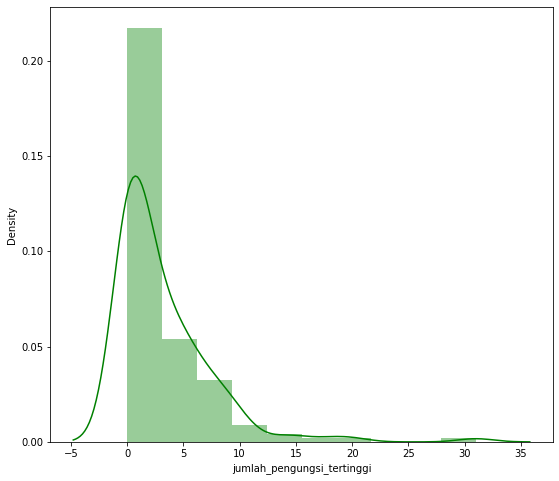

In [ ]:
print(df['jumlah_pengungsi_tertinggi'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['jumlah_pengungsi_tertinggi'], color='g', bins=10, hist_kws={'alpha': 0.4});

# Apa gunanya distplot? 
# Apa itu data parametrik? 

count     150.000000
mean      553.960000
std       881.477846
min         0.000000
25%        17.000000
50%       192.500000
75%       693.750000
max      4560.000000
Name: jumlah_terdampak_jiwa, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


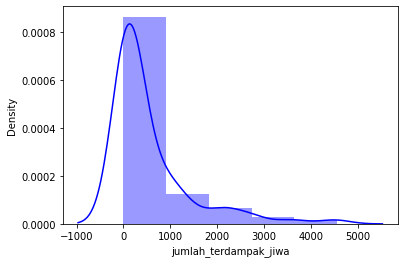

In [ ]:
print(df['jumlah_terdampak_jiwa'].describe())
sns.distplot(df['jumlah_terdampak_jiwa'], color='b', bins= 5, hist_kws={'alpha': 0.4});

count     150.000000
mean      481.666667
std       764.574380
min         0.000000
25%         0.000000
50%       150.000000
75%       572.000000
max      4461.000000
Name: jumlah_luka_ringan, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


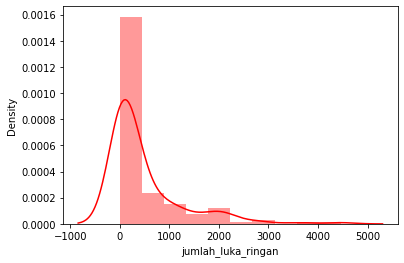

In [ ]:
print(df['jumlah_luka_ringan'].describe())
sns.distplot(df['jumlah_luka_ringan'], color='r', bins=10, hist_kws={'alpha': 0.4});

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df['tanggal_kejadian'])
le.classes_
#df['kategori_sarana_rusak']=le.transform(df['kategori_sarana_rusak'])

array(['tgl 18 Januari', 'tgl. 01 , 23, 24 Januari', 'tgl. 01 Januari',
       'tgl. 01 Januari ', 'tgl. 01 Januari s/d 05 Januari',
       'tgl. 01, 09 Januari', 'tgl. 01, 09 Januari ',
       'tgl. 01, 09, 18 Januari', 'tgl. 01, 09, 18 Januari ',
       'tgl. 01, 18  Januari', 'tgl. 01, 18 Januari',
       'tgl. 01, 18, 20, 24  Januari', 'tgl. 01, 24 Januari',
       'tgl. 01, 24, 26  Januari', 'tgl. 01, 26 Januari',
       'tgl. 01, 27 Januari', 'tgl. 02 & 18 Januari', 'tgl. 02 Januari',
       'tgl. 18 Januari', 'tgl. 18 Januari ', 'tgl. 24 Januari',
       'tgl. 24, 27, 28, 30, 31  Januari'], dtype=object)

In [ ]:
df['jumlah_pengungsi_tertinggi'][df['jumlah_pengungsi_tertinggi']!='ada'] > 1  
df['jumlah_pengungsi_tertinggi'][df['jumlah_pengungsi_tertinggi']=='Tidak ada'] = 0  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head()

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,140,1,0,0
1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,tgl. 01 Januari,1,0,0,0,0,0,0,0
3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,625,5,0,0
4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,195,6,0,0


In [ ]:
#df['kategori_sarana_rusak']=le.transform(df['kategori_sarana_rusak'])

In [ ]:
df.head()

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,140,1,0,0
1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,tgl. 01 Januari,1,0,0,0,0,0,0,0
3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,625,5,0,0
4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,195,6,0,0


ValueError: ignored

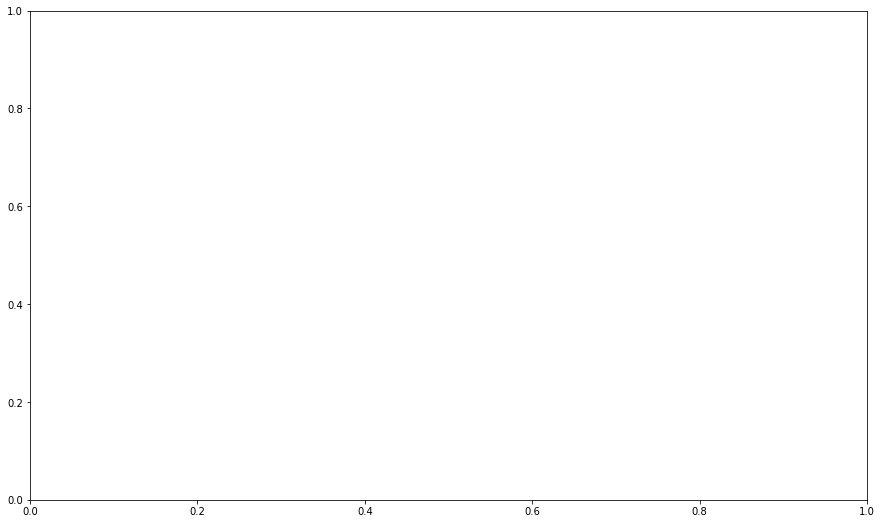

In [ ]:
# create a figure and axis 
fig, ax = plt.subplots(figsize=(15, 9)) 
# count the occurrence of each class 
data = df[df.groupby('kota_administrasi').sum()['jumlah_luka_ringan'].reset_index()]
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Frequency ') 
ax.set_xlabel('Kota Administrasi') 
ax.set_ylabel('Frequency')
for p, label in zip(ax.patches, df['jumlah_luka_ringan'].value_counts().values):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))
plt.setp(ax.get_xticklabels(), rotation=50, ha="left")
#data kebakaran paling banyak ada di jakarta timur

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

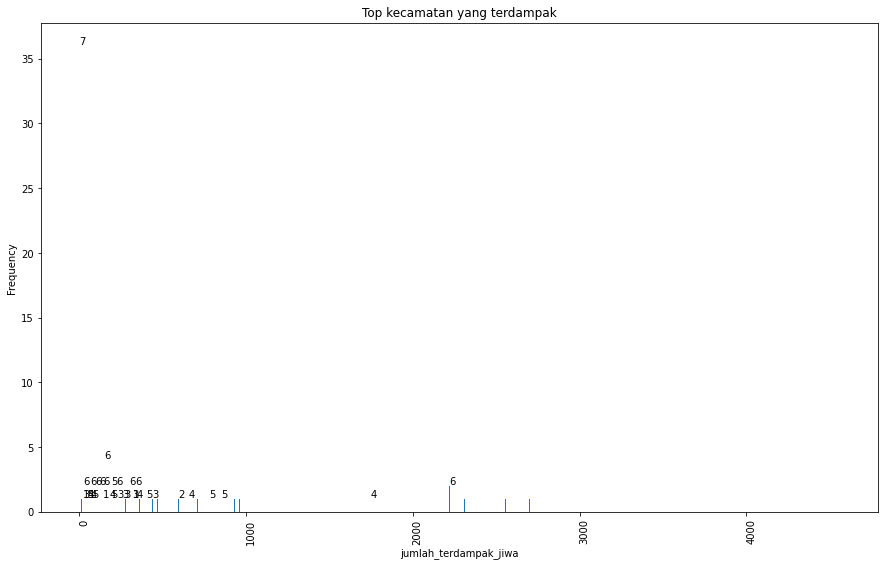

In [24]:
# create a figure and axis 
fig, ax = plt.subplots(figsize=(15, 9)) 
# count the occurrence of each class 
data = df['jumlah_terdampak_jiwa'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Top kecamatan yang terdampak') 
ax.set_xlabel('jumlah_terdampak_jiwa') 
ax.set_ylabel('Frequency')
for p, label in zip(ax.patches, df['kecamatan'].value_counts().values):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-januari.csv")

In [ ]:
df.head()

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,140,1,0,0
1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,tgl. 01 Januari,1,0,0,0,0,0,0,0
3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,625,5,0,0
4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,195,6,0,0


In [ ]:
df.corr().style.background_gradient().set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
jumlah_terdampak_rw,1.00,0.60,0.39,0.38,0.23,nan,nan,nan,0.45,0.33,nan,nan
jumlah_terdampak_rt,0.60,1.00,0.55,0.50,0.05,nan,nan,nan,0.27,0.28,nan,nan
jumlah_terdampak_kk,0.39,0.55,1.00,0.98,0.16,nan,nan,nan,0.71,0.51,nan,nan
jumlah_terdampak_jiwa,0.38,0.50,0.98,1.00,0.18,nan,nan,nan,0.77,0.56,nan,nan
lama_genangan,0.23,0.05,0.16,0.18,1.00,nan,nan,nan,0.24,0.11,nan,nan
jumlah_meninggal,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
jumlah_hilang,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
jumlah_luka_berat,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
jumlah_luka_ringan,0.45,0.27,0.71,0.77,0.24,nan,nan,nan,1.00,0.66,nan,nan
jumlah_pengungsi_tertinggi,0.33,0.28,0.51,0.56,0.11,nan,nan,nan,0.66,1.00,nan,nan


ValueError: ignored

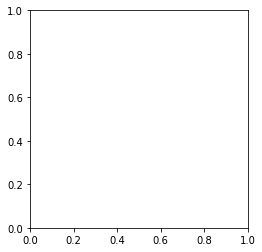

In [ ]:
c = df.groupby('kota_administrasi').sum()['jumlah_luka_ringan'].reset_index()

values = c
labels = c.keys()
plt.pie(values, labels= values, shadow=True)
plt.title('jumlah_luka_ringan')
plt.legend(labels,loc='best')
plt.show()

ValueError: ignored

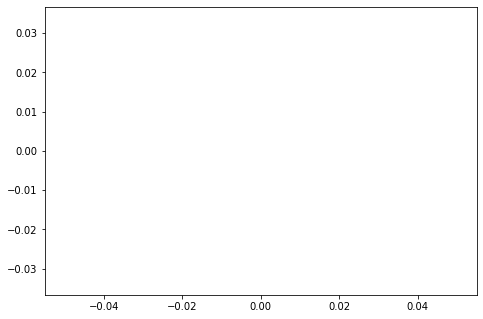

In [ ]:
dfsurvived = df.groupby('kota_administrasi').sum()['jumlah_luka_ringan'].reset_index()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(dfsurvived['kota_administrasi'],labels=dfsurvived['jumlah_luka_ringan'],autopct='%1.2f%%')
plt.show()